In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn.model_selection, sklearn.linear_model, sklearn.svm, sklearn.metrics, sklearn.preprocessing, sklearn.pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
warnings.filterwarnings('ignore')



In [4]:
#Load CSV file into Dataframe
df= pd.read_csv("/content/voice.csv")

In [5]:
df.head(5)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [6]:
#Data PreProcesing

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [7]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [8]:
df.isnull().sum().sum()

0

In [9]:
# encodeing labels from string to bool
df.replace(to_replace='male', value=0, inplace=True)
df.replace(to_replace='female', value=1, inplace=True)


In [10]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x.shape,y.shape

((3168, 20), (3168,))

In [11]:
# Splitting the data into Trainig and Testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=1)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2217, 20), (951, 20), (2217,), (951,))

In [12]:
print(x_train[:5])


      meanfreq        sd    median       Q25       Q75       IQR      skew  \
1866  0.141083  0.088698  0.179804  0.043235  0.217778  0.174542  1.597069   
767   0.167021  0.057011  0.187109  0.106603  0.207457  0.100853  2.312101   
2862  0.234486  0.034413  0.240764  0.223822  0.252357  0.028535  2.352412   
1064  0.197073  0.057609  0.217386  0.138016  0.243843  0.105827  1.742157   
270   0.142018  0.071383  0.139775  0.094235  0.202899  0.108663  2.462172   

           kurt    sp.ent       sfm      mode  centroid   meanfun    minfun  \
1866   5.560671  0.941751  0.601127  0.225327  0.141083  0.174179  0.016824   
767    9.115040  0.908148  0.420416  0.201264  0.167021  0.100181  0.017448   
2862   8.151319  0.813883  0.166600  0.244331  0.234486  0.179095  0.054670   
1064   7.871708  0.911062  0.322959  0.222677  0.197073  0.138659  0.047525   
270   10.411437  0.940602  0.613985  0.017134  0.142018  0.108932  0.016461   

        maxfun   meandom    mindom    maxdom   dfrange  

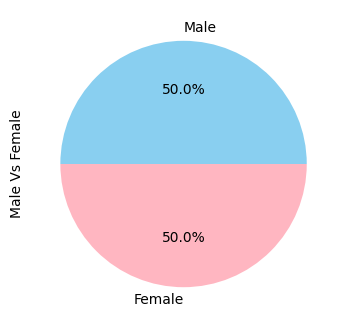

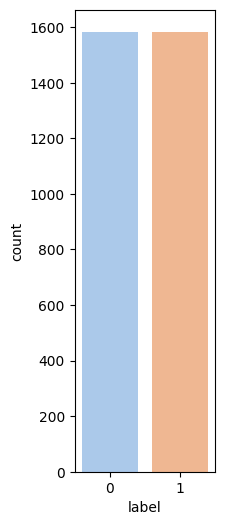

In [13]:
#Data Visualization
plt.figure(figsize=(4,4))
plt.subplot(1,1,1)

df.label.value_counts().plot(kind='pie',
                             fontsize=10,
                             labels=["Male","Female"],
                             ylabel="Male Vs Female",
                             autopct='%1.1f%%',
                             colors=['#89CFF0','#FFB6C1']);
plt.show()
plt.figure(figsize=(4,6))
plt.subplot(1,2,2)
sns.countplot(x='label',data=df,
              order=df['label'].value_counts().index,
              palette='pastel')

plt.show()


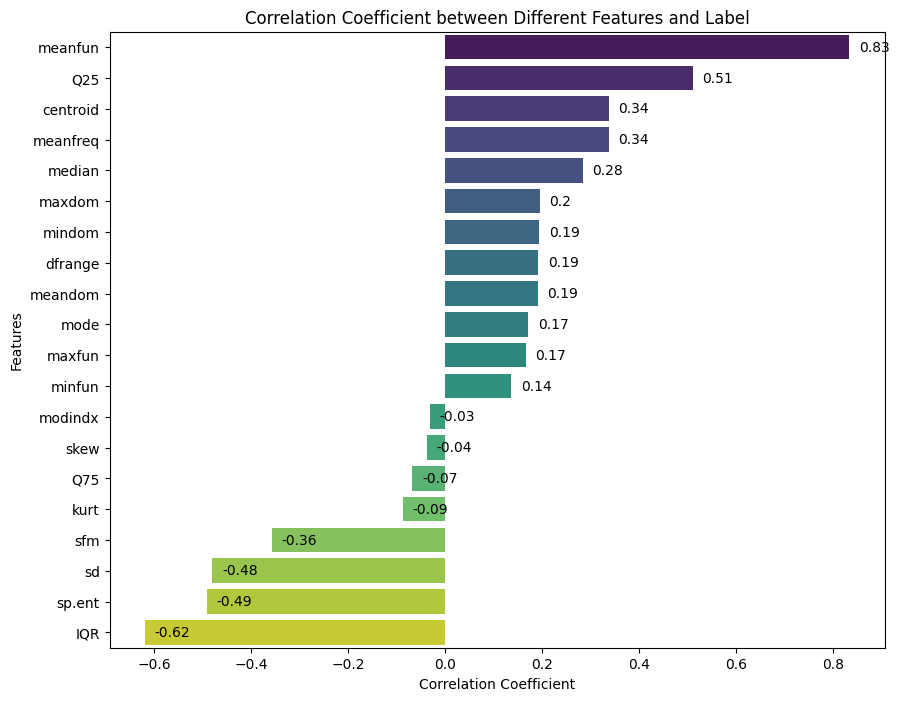

In [14]:
plt.figure(figsize=(10,8))
data = df.corr()["label"].sort_values(ascending=False)
indices = data.index.values
labels = []
corr = []
for i in range(1, len(indices)):
    labels.append(indices[i])
    corr.append(data[i])
sns.barplot(x=corr, y=labels, palette='viridis')
plt.title('Correlation Coefficient between Different Features and Label')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
for i, v in enumerate(corr):
    plt.text(v + 0.02, i, str(round(v, 2)), color='black', va='center')
plt.show()

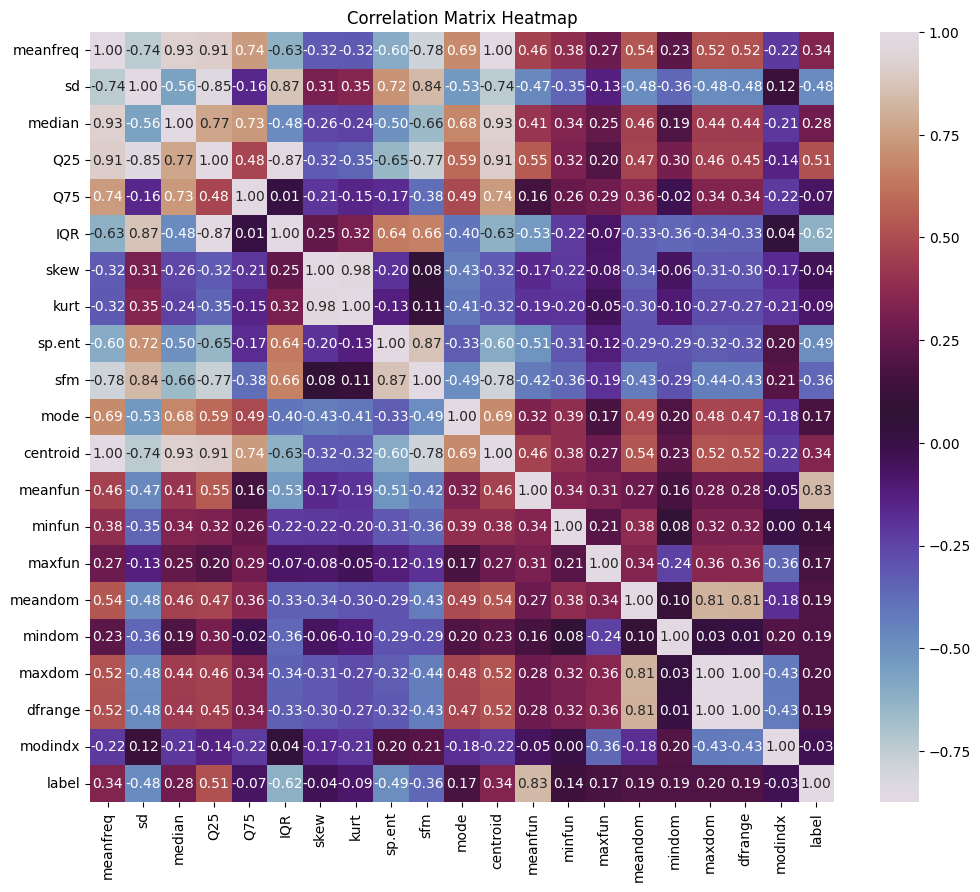

<Figure size 1200x1000 with 0 Axes>

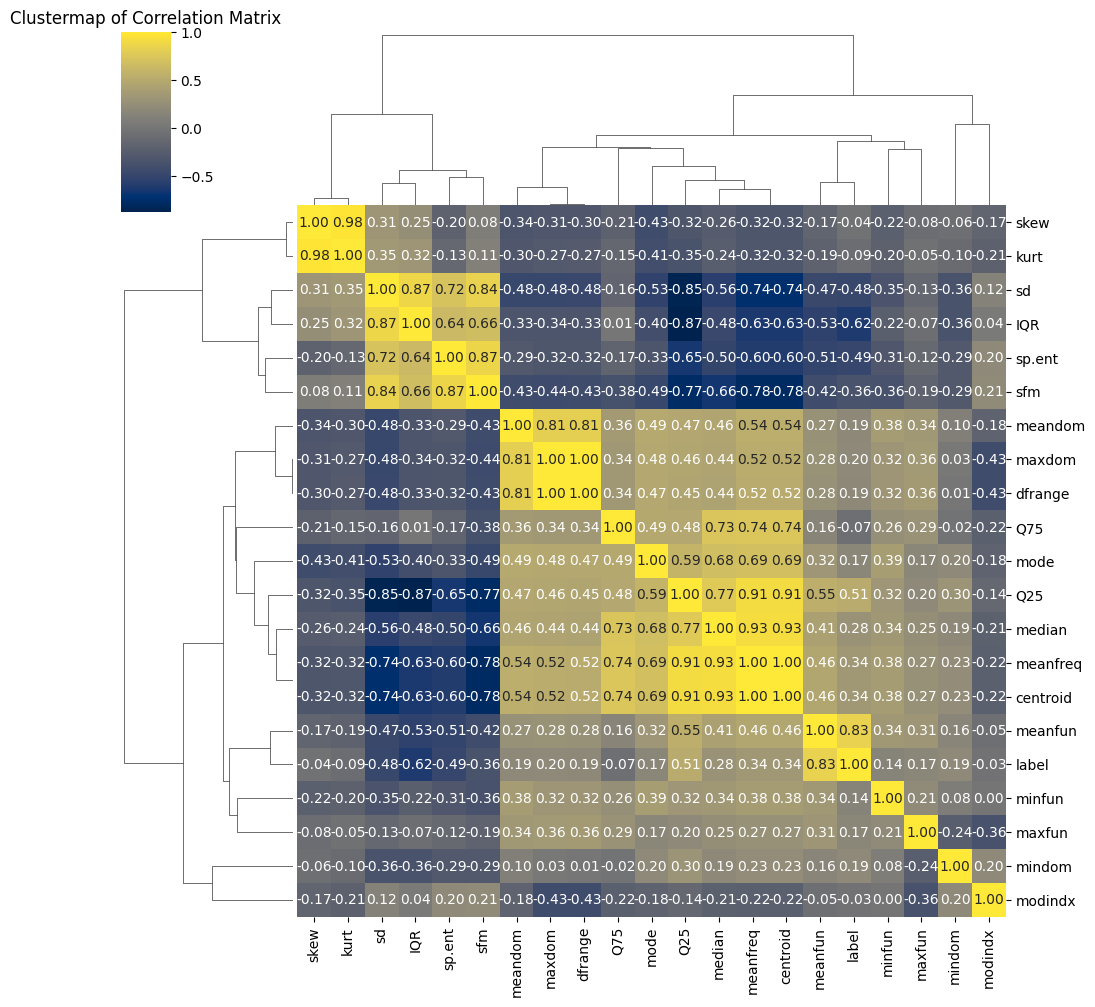

In [15]:
#Correaltion Coefficent
corr=df.corr()
#Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='twilight', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()
#Clustermap
plt.figure(figsize=(12,10))
sns.clustermap(corr, cmap='cividis', annot=True, fmt=".2f")
plt.title('Clustermap of Correlation Matrix')
plt.show()

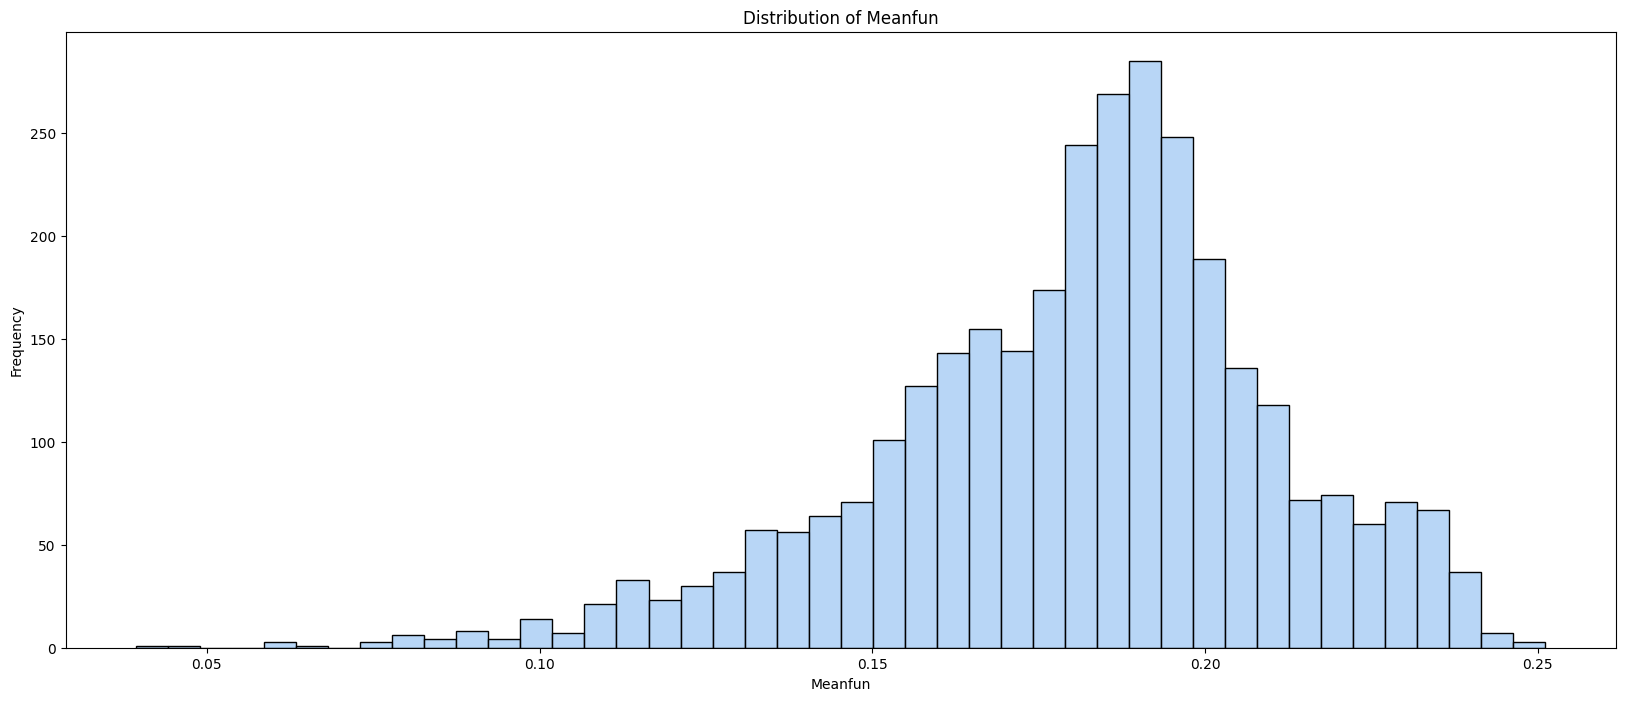

In [16]:
plt.figure(figsize=(20, 8))
sns.histplot(df.meanfreq, color=sns.color_palette('pastel')[0])
plt.title('Distribution of Meanfun')
plt.xlabel('Meanfun')
plt.ylabel('Frequency')
plt.show()

Logistic Regression Training Accuracy: 0.900766801984664 

Accuracy of Logitic Regression: 0.9106203995793901 

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       494
           1       0.95      0.86      0.90       457

    accuracy                           0.91       951
   macro avg       0.91      0.91      0.91       951
weighted avg       0.91      0.91      0.91       951



[Text(0.5, 1.0, 'Logistic Regression')]

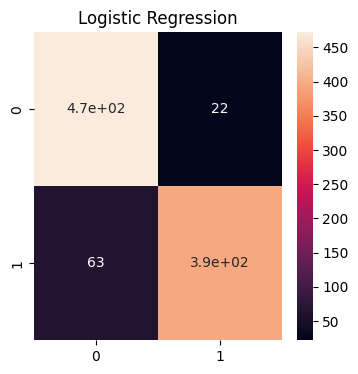

In [17]:
#Logistic Regression
LR= LogisticRegression(solver='liblinear')
LR.fit(x_train,y_train)
LRC_train=LR.score(x_train,y_train)
print("Logistic Regression Training Accuracy:",LRC_train,'\n')
y_pred = LR.predict(x_test)
accuracy_LRC = accuracy_score(y_test, y_pred)
print("Accuracy of Logitic Regression:",accuracy_LRC,'\n')
print("Classification Report:\n",classification_report(y_test, y_pred))
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True).set(title='Logistic Regression')

Logistic Regression Training Accuracy: 0.9769959404600812 

Accuracy of Logitic Regression: 0.9747634069400631 

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       494
           1       0.97      0.98      0.97       457

    accuracy                           0.97       951
   macro avg       0.97      0.97      0.97       951
weighted avg       0.97      0.97      0.97       951



[Text(0.5, 1.0, 'Logistic Regression')]

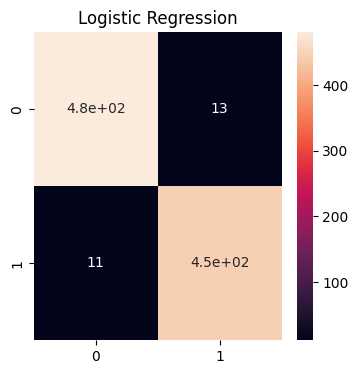

In [18]:
from re import X
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)
LR = LogisticRegression()
LR.fit(X_train, y_train)
LR_train = LR.score(X_train, y_train)
print("Logistic Regression Training Accuracy:",LR_train,'\n')
y_pred = LR.predict(X_test)
accuracy_LR= accuracy_score(y_test, y_pred)
print("Accuracy of Logitic Regression:",accuracy_LR,'\n')
print("Classification Report:\n",classification_report(y_test, y_pred))
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True).set(title='Logistic Regression')

In [19]:
print(X_train[:5])

[[-1.32053814  1.89555675 -0.15686072 -1.99224515 -0.28226342  2.11196699
  -0.37037374 -0.23176338  1.04420621  1.09198646  0.77368798 -1.32053814
   0.97352509 -1.05441272  0.11575309 -0.37529724 -0.70808704 -0.40803333
  -0.3953972   0.55298727]
 [-0.45919345 -0.00405221  0.04313591 -0.69362395 -0.71317937  0.39142635
  -0.19758896 -0.20439588  0.2920288   0.07174406  0.45930455 -0.45919345
  -1.3277004  -1.02092054  0.56210782 -0.90237626 -0.70808704 -0.75558088
  -0.74305405 -0.04376772]
 [ 1.78113172 -1.35876196  1.51209715  1.70855978  1.16142264 -1.29709516
  -0.18784798 -0.21181622 -1.81808035 -1.36123077  1.02198116  1.78113172
   1.12639695  0.97750639  0.56210782  1.77571331 -0.46240948  1.05742195
   1.0660902  -0.02812394]
 [ 0.53872923  0.03178713  0.87204668 -0.04988379  0.80595204  0.50755482
  -0.33531378 -0.21396914  0.35725445 -0.47847199  0.73907046  0.53872923
  -0.1310916   0.5938931   0.61456955  0.68784302 -0.46240948  0.84490879
   0.85351022 -0.62975693]
 [-1

In [20]:
print(x_train[:5])

      meanfreq        sd    median       Q25       Q75       IQR      skew  \
1866  0.141083  0.088698  0.179804  0.043235  0.217778  0.174542  1.597069   
767   0.167021  0.057011  0.187109  0.106603  0.207457  0.100853  2.312101   
2862  0.234486  0.034413  0.240764  0.223822  0.252357  0.028535  2.352412   
1064  0.197073  0.057609  0.217386  0.138016  0.243843  0.105827  1.742157   
270   0.142018  0.071383  0.139775  0.094235  0.202899  0.108663  2.462172   

           kurt    sp.ent       sfm      mode  centroid   meanfun    minfun  \
1866   5.560671  0.941751  0.601127  0.225327  0.141083  0.174179  0.016824   
767    9.115040  0.908148  0.420416  0.201264  0.167021  0.100181  0.017448   
2862   8.151319  0.813883  0.166600  0.244331  0.234486  0.179095  0.054670   
1064   7.871708  0.911062  0.322959  0.222677  0.197073  0.138659  0.047525   
270   10.411437  0.940602  0.613985  0.017134  0.142018  0.108932  0.016461   

        maxfun   meandom    mindom    maxdom   dfrange  

KNN Training Accuracy: 0.85340550293189 

Accuracy of KNN: 0.7160883280757098 

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.74      0.73       494
           1       0.71      0.69      0.70       457

    accuracy                           0.72       951
   macro avg       0.72      0.72      0.72       951
weighted avg       0.72      0.72      0.72       951



[Text(0.5, 1.0, 'KNN')]

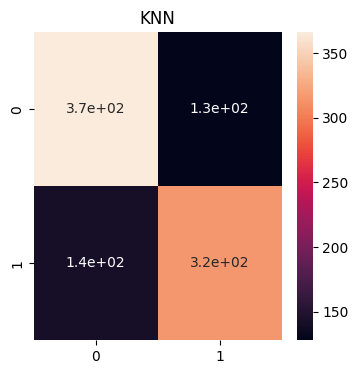

In [21]:
#K-Nearest Neighbor
KNN= KNeighborsClassifier(n_neighbors=3)
KNN.fit(x_train,y_train)
KNN_pred=KNN.predict(x_test)
KN_train=KNN.score(x_train,y_train)
print("KNN Training Accuracy:",KN_train,'\n')
accuracy_KN= accuracy_score(y_test,KNN_pred)
print("Accuracy of KNN:",accuracy_KN,'\n')
print("Classification Report:\n",classification_report(y_test, KNN_pred))
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_matrix(y_test, KNN_pred), annot=True).set(title='KNN')

KNN Training Accuracy: 0.98872350022553 

Accuracy of KNN: 0.9800210304942166 

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       494
           1       0.98      0.97      0.98       457

    accuracy                           0.98       951
   macro avg       0.98      0.98      0.98       951
weighted avg       0.98      0.98      0.98       951



[Text(0.5, 1.0, 'Logistic Regression')]

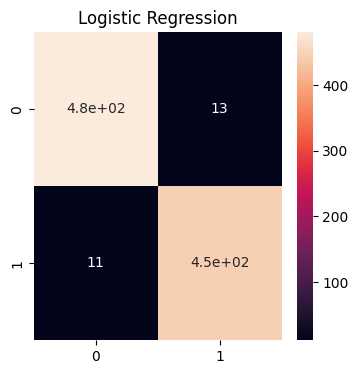

In [22]:
#Train model using Scaling Feature
from sklearn.preprocessing import MinMaxScaler
scc=MinMaxScaler()
X_train=scc.fit_transform(x_train)
X_test=scc.transform(x_test)
KNN= KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train,y_train)
KNN_train=KNN.score(X_train,y_train)
print("KNN Training Accuracy:",KNN_train,'\n')
KNN_pred=KNN.predict(X_test)
accuracy_KNN= accuracy_score(y_test,KNN_pred)
print("Accuracy of KNN:",accuracy_KNN,'\n')
print("Classification Report:\n",classification_report(y_test, KNN_pred))
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True).set(title='Logistic Regression')


SVM Training Accuracy: 0.9742895805142084 

Accuracy of SVM: 0.9695057833859095 

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       494
           1       0.97      0.97      0.97       457

    accuracy                           0.97       951
   macro avg       0.97      0.97      0.97       951
weighted avg       0.97      0.97      0.97       951



[Text(0.5, 1.0, 'SVM')]

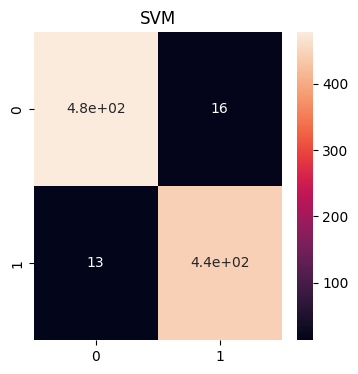

In [23]:
#SVM Model
SVM=SVC(kernel='linear',C=10)
SVM.fit(x_train,y_train)
SVM_train=SVM.score(x_train,y_train)
print("SVM Training Accuracy:",SVM_train,'\n')
SVM_pred=SVM.predict(x_test)
accuracy_SVM= accuracy_score(y_test,SVM_pred)

print("Accuracy of SVM:",accuracy_SVM,'\n')
print("Classification Report:\n",classification_report(y_test, SVM_pred))
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_matrix(y_test, SVM_pred), annot=True).set(title='SVM')

Random Forest Training Accuracy: 1.0 

Accuracy of Random Forest: 0.9747634069400631 

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       494
           1       0.97      0.98      0.97       457

    accuracy                           0.97       951
   macro avg       0.97      0.97      0.97       951
weighted avg       0.97      0.97      0.97       951



[Text(0.5, 1.0, 'Random Forest')]

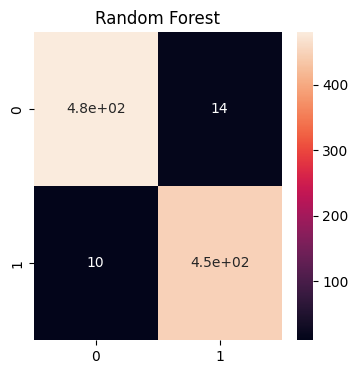

In [24]:
#Random Forest
RF=RandomForestClassifier(n_estimators=100)
RF.fit(x_train,y_train)
RF_train=RF.score(x_train,y_train)
print("Random Forest Training Accuracy:",RF_train,'\n')
RF_pred=RF.predict(x_test)
accuracy_RF= accuracy_score(y_test,RF_pred)
print("Accuracy of Random Forest:",accuracy_RF,'\n')
print("Classification Report:\n",classification_report(y_test, RF_pred))
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_matrix(y_test, RF_pred), annot=True).set(title='Random Forest')


Decision Tree Train Score: 1.0 

Accuracy of Decision Tree: 0.9737118822292324 

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       494
           1       0.97      0.98      0.97       457

    accuracy                           0.97       951
   macro avg       0.97      0.97      0.97       951
weighted avg       0.97      0.97      0.97       951



[Text(0.5, 1.0, 'Decision Tree')]

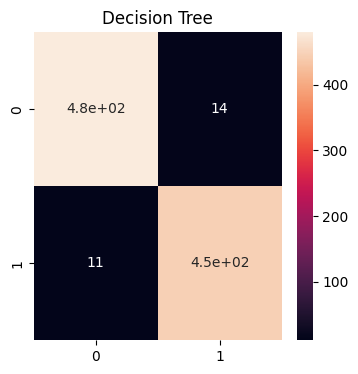

In [25]:
#Decision Tree
DT= DecisionTreeClassifier()
DT.fit(x_train,y_train)
DT_train=DT.score(x_train,y_train)
print("Decision Tree Train Score:",DT_train,'\n')
DT_pred=DT.predict(x_test)
accuracy_DT= accuracy_score(y_test,DT_pred)
print("Accuracy of Decision Tree:",accuracy_DT,'\n')
print("Classification Report:\n",classification_report(y_test, DT_pred))
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_matrix(y_test, DT_pred), annot=True).set(title='Decision Tree')

Gaussian Process Classifier Train Score: 0.8173207036535859 

Accuracy of Gaussian Process Classifier: 0.7308096740273397 

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.77      0.75       494
           1       0.73      0.69      0.71       457

    accuracy                           0.73       951
   macro avg       0.73      0.73      0.73       951
weighted avg       0.73      0.73      0.73       951



[Text(0.5, 1.0, 'Gaussian Process Classifier')]

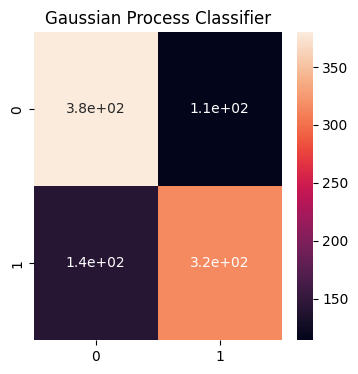

In [26]:
#Gaussian Process Classifier
Gp= GaussianProcessClassifier()
Gp.fit(x_train,y_train)
Gp_train=Gp.score(x_train,y_train)
print("Gaussian Process Classifier Train Score:",Gp_train,'\n')
Gp_pred=Gp.predict(x_test)
accuracy_Gp= accuracy_score(y_test,Gp_pred)
print("Accuracy of Gaussian Process Classifier:",accuracy_Gp,'\n')
print("Classification Report:\n",classification_report(y_test,Gp_pred))
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_matrix(y_test, Gp_pred), annot=True).set(title='Gaussian Process Classifier')

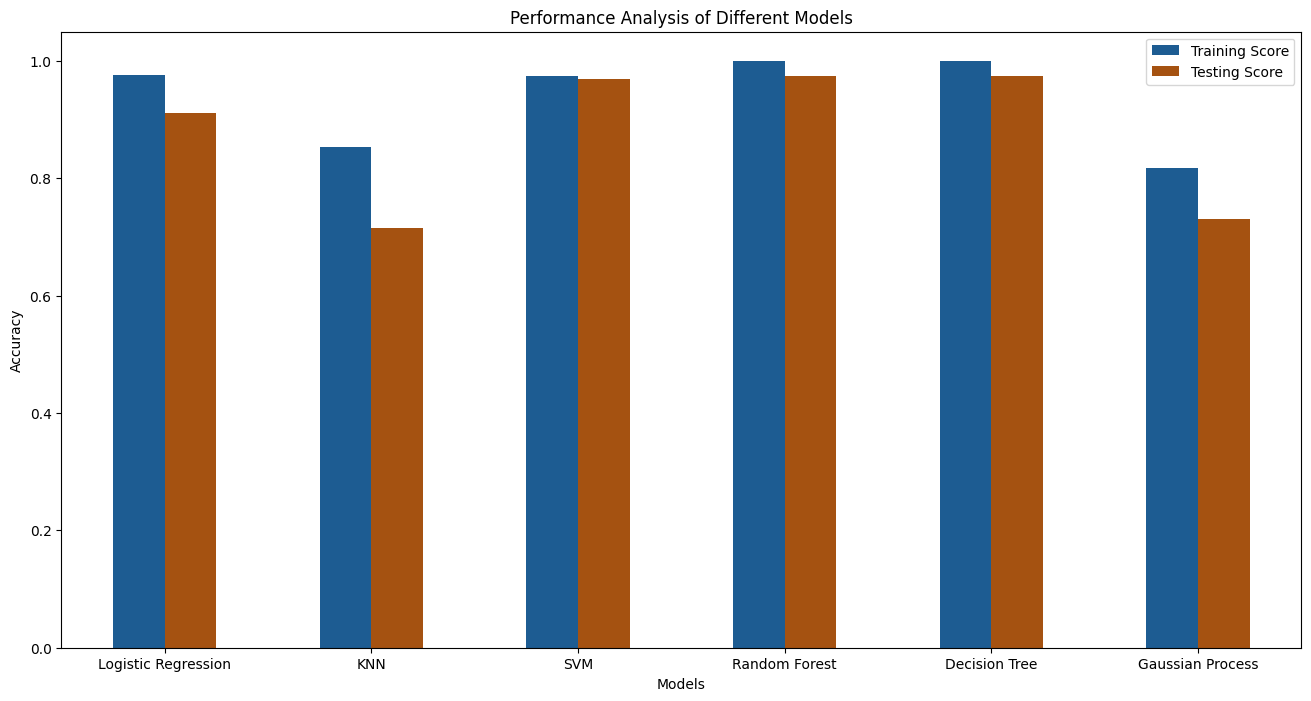

In [27]:
#Performance Anaylsis
models = ['Logistic Regression', 'KNN', 'SVM', 'Random Forest', 'Decision Tree', 'Gaussian Process']
accuracies = [accuracy_LRC, accuracy_KN, accuracy_SVM, accuracy_RF, accuracy_DT, accuracy_Gp]
training=[LR_train,KN_train,SVM_train,RF_train, DT_train,Gp_train]

scores = pd.DataFrame({'Training Score': training,'Testing Score': accuracies}, index= models)
plot = scores.plot.bar(figsize=(16, 8), rot=0, color=['#1D5C92', '#A55211'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Performance Analysis of Different Models")
plt.legend(loc='best')
plt.show()



In [28]:
print(scores)


                     Training Score  Testing Score
Logistic Regression        0.976996       0.910620
KNN                        0.853406       0.716088
SVM                        0.974290       0.969506
Random Forest              1.000000       0.974763
Decision Tree              1.000000       0.973712
Gaussian Process           0.817321       0.730810
